In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-image/peakpx.jpg
/kaggle/input/bachchan-2/Amitabh Bachchan Hd image.jpg
/kaggle/input/dataset/My dataset/Prabhas/Image_22.jpg
/kaggle/input/dataset/My dataset/Prabhas/45.jpg
/kaggle/input/dataset/My dataset/Prabhas/89.jpg
/kaggle/input/dataset/My dataset/Prabhas/20.jpg
/kaggle/input/dataset/My dataset/Prabhas/6.jpg
/kaggle/input/dataset/My dataset/Prabhas/Image_53.jpg
/kaggle/input/dataset/My dataset/Prabhas/Prabhas.127.jpg
/kaggle/input/dataset/My dataset/Prabhas/76.jpg
/kaggle/input/dataset/My dataset/Prabhas/71.jpg
/kaggle/input/dataset/My dataset/Prabhas/5c3af3f84f.jpg
/kaggle/input/dataset/My dataset/Prabhas/Prabhas.271.jpg
/kaggle/input/dataset/My dataset/Prabhas/124.jpeg
/kaggle/input/dataset/My dataset/Prabhas/115.jpg
/kaggle/input/dataset/My dataset/Prabhas/131.jpg
/kaggle/input/dataset/My dataset/Prabhas/5.jpg
/kaggle/input/dataset/My dataset/Prabhas/3258d5bab3.jpg
/kaggle/input/dataset/My dataset/Prabhas/Prabhas.156.jpg
/kaggle/input/dataset/My dataset/Prab

In [48]:
import os
import cv2
import numpy as np

# Define the dataset path
dataset_path = "/kaggle/input/dataset/My dataset"

# Supported image formats
valid_formats = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

# Dictionary to store images by class
data = {}

# Iterate through the dataset directory
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        images = []
        for file in os.listdir(class_path):
            if file.lower().endswith(valid_formats):
                file_path = os.path.join(class_path, file)
                try:
                    # Read the image using cv2
                    image = cv2.imread(file_path, cv2.IMREAD_COLOR)
                    if image is not None:
                        # Resize all images to a consistent size
                        image = cv2.resize(image, (224, 224))
                        images.append(image)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
        data[class_name] = np.array(images)

# Check the results
for class_name, images in data.items():
    print(f"Loaded {len(images)} images for class '{class_name}'.")


libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Loaded 288 images for class 'Prabhas'.
Loaded 239 images for class 'Amitabh Bachchan'.
Loaded 336 images for class 'vijay'.
Loaded 310 images for class 'Akshay Kumar'.


In [57]:
import cv2
import numpy as np

# Function to apply preprocessing
def preprocess_image(image):
    # Resize the image to a fixed size (e.g., 224x224)
    resized_image = cv2.resize(image, (128, 128))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to improve contrast
    equalized_image = cv2.equalizeHist(gray_image)

    # Normalize the image to have pixel values between 0 and 1
    normalized_image = equalized_image / 255.0

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(np.uint8(blurred_image * 255), 100, 200)

    # Stack the grayscale, blurred, and edges as channels (optional, for visualization)
    preprocessed_image = np.stack([normalized_image, blurred_image, edges], axis=-1)

    return preprocessed_image

# Apply preprocessing to all images in the dataset
preprocessed_data = {}
for class_name, images in data.items():
    preprocessed_images = [preprocess_image(image) for image in images]
    preprocessed_data[class_name] = np.array(preprocessed_images)

# Check the results
for class_name, images in preprocessed_data.items():
    print(f"Preprocessed {len(images)} images for class '{class_name}'.")


Preprocessed 288 images for class 'Prabhas'.
Preprocessed 239 images for class 'Amitabh Bachchan'.
Preprocessed 336 images for class 'vijay'.
Preprocessed 310 images for class 'Akshay Kumar'.


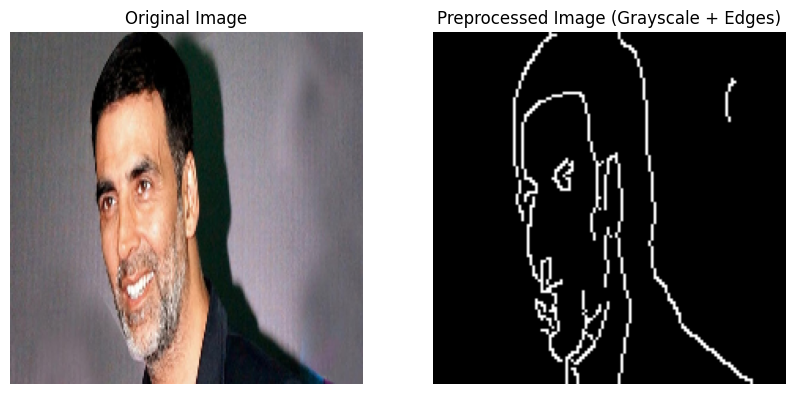

In [58]:
import matplotlib.pyplot as plt

# Display an example image before and after preprocessing
example_image = data['Akshay Kumar'][0]
processed_image = preprocess_image(example_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Preprocessed Image (Grayscale + Edges)")
plt.imshow(processed_image[:, :, 2], cmap='gray')  # Display edges
plt.axis("off")

plt.show()


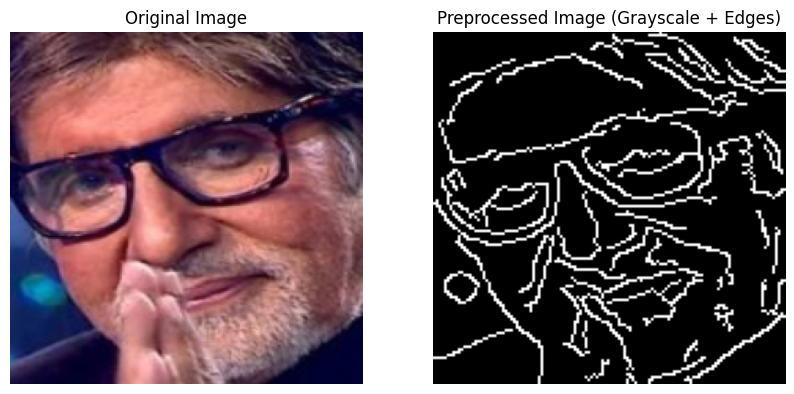

In [59]:
import matplotlib.pyplot as plt

# Display an example image before and after preprocessing
example_image = data['Amitabh Bachchan'][0]
processed_image = preprocess_image(example_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Preprocessed Image (Grayscale + Edges)")
plt.imshow(processed_image[:, :, 2], cmap='gray')  # Display edges
plt.axis("off")

plt.show()


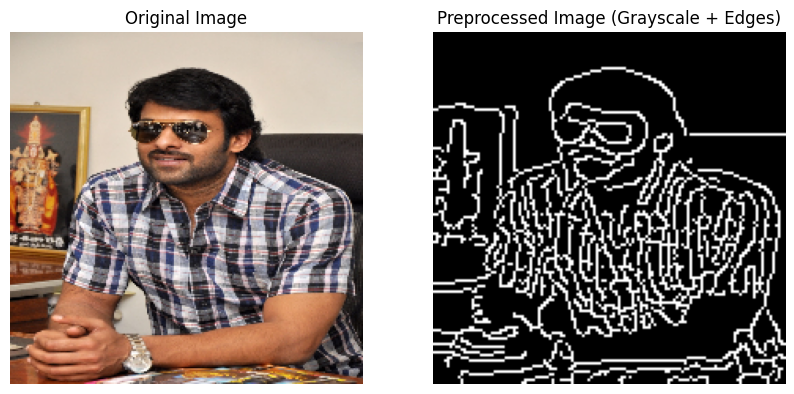

In [60]:
import matplotlib.pyplot as plt

# Display an example image before and after preprocessing
example_image = data['Prabhas'][0]
processed_image = preprocess_image(example_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Preprocessed Image (Grayscale + Edges)")
plt.imshow(processed_image[:, :, 2], cmap='gray')  # Display edges
plt.axis("off")

plt.show()


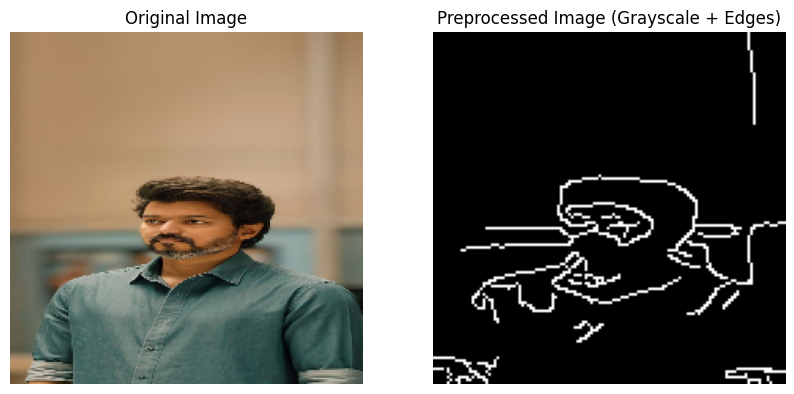

In [61]:
import matplotlib.pyplot as plt

# Display an example image before and after preprocessing
example_image = data['vijay'][0]
processed_image = preprocess_image(example_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Preprocessed Image (Grayscale + Edges)")
plt.imshow(processed_image[:, :, 2], cmap='gray')  # Display edges
plt.axis("off")

plt.show()


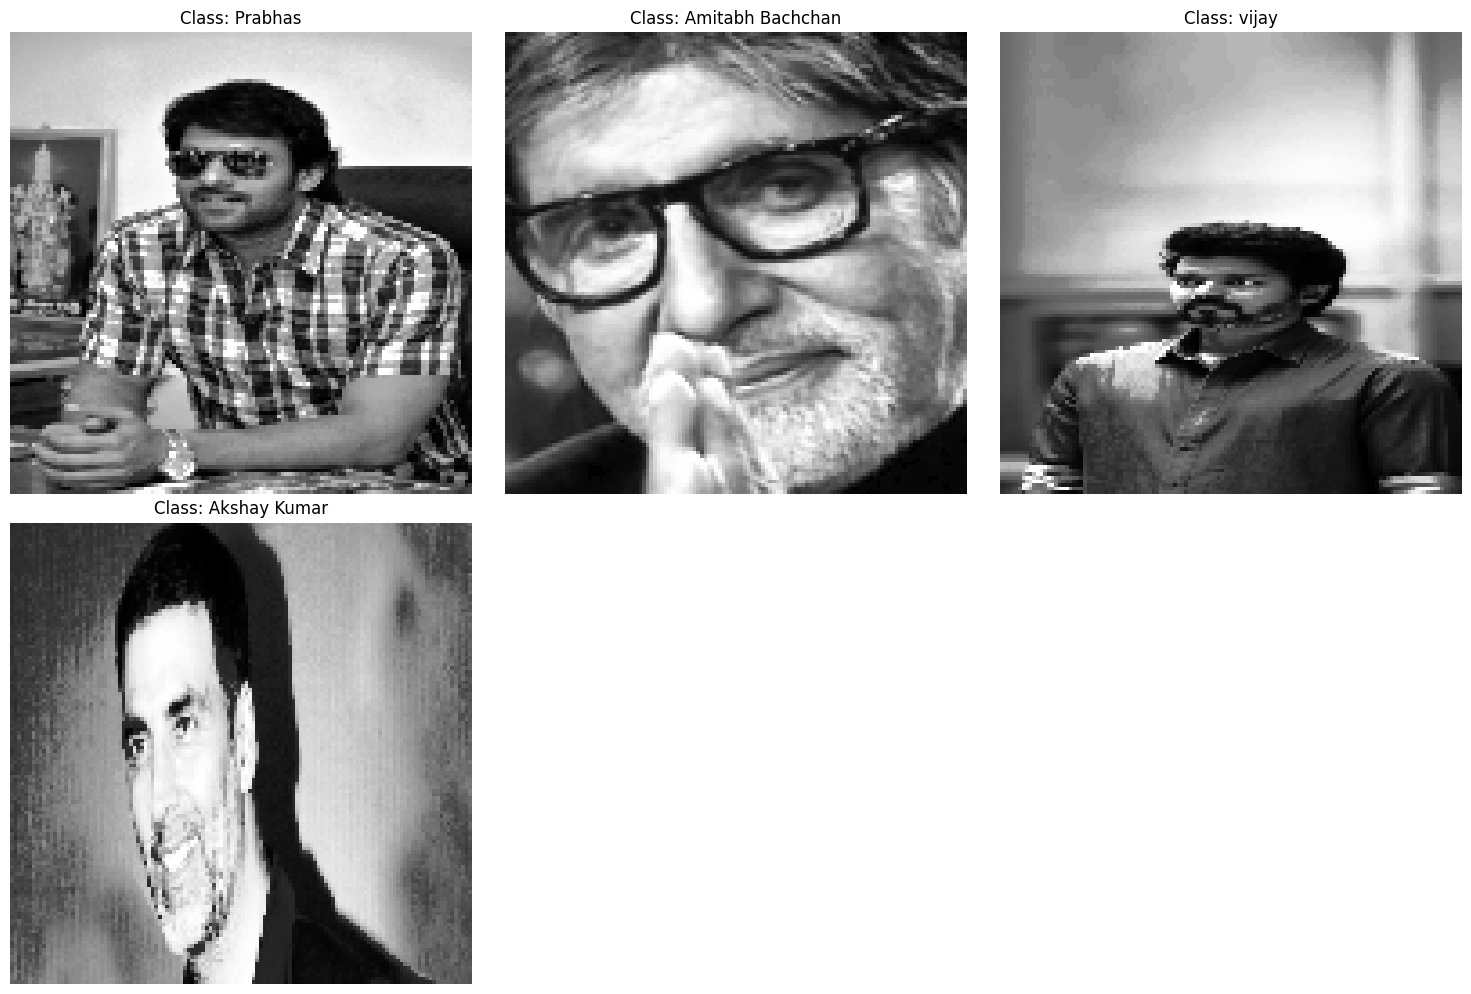

In [63]:
import matplotlib.pyplot as plt

# Function to visualize the first image from each folder
def visualize_preprocessed_images(preprocessed_data):
    plt.figure(figsize=(15, 10))
    for idx, (class_name, images) in enumerate(preprocessed_data.items()):
        if len(images) > 0:  # Ensure there are images in the class
            preprocessed_image = images[0]  # First image of the class
            
            # Display the image
            plt.subplot(2, len(preprocessed_data) // 2 + 1, idx + 1)
            if preprocessed_image.ndim == 3:
                # If preprocessed image has stacked channels, display a specific one
                plt.imshow(preprocessed_image[:, :, 0], cmap='gray')  # Grayscale channel
            else:
                plt.imshow(preprocessed_image, cmap='gray')  # Single channel
            plt.title(f"Class: {class_name}")
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function
visualize_preprocessed_images(preprocessed_data)


ValueError: num must be an integer with 1 <= num <= 6, not 7

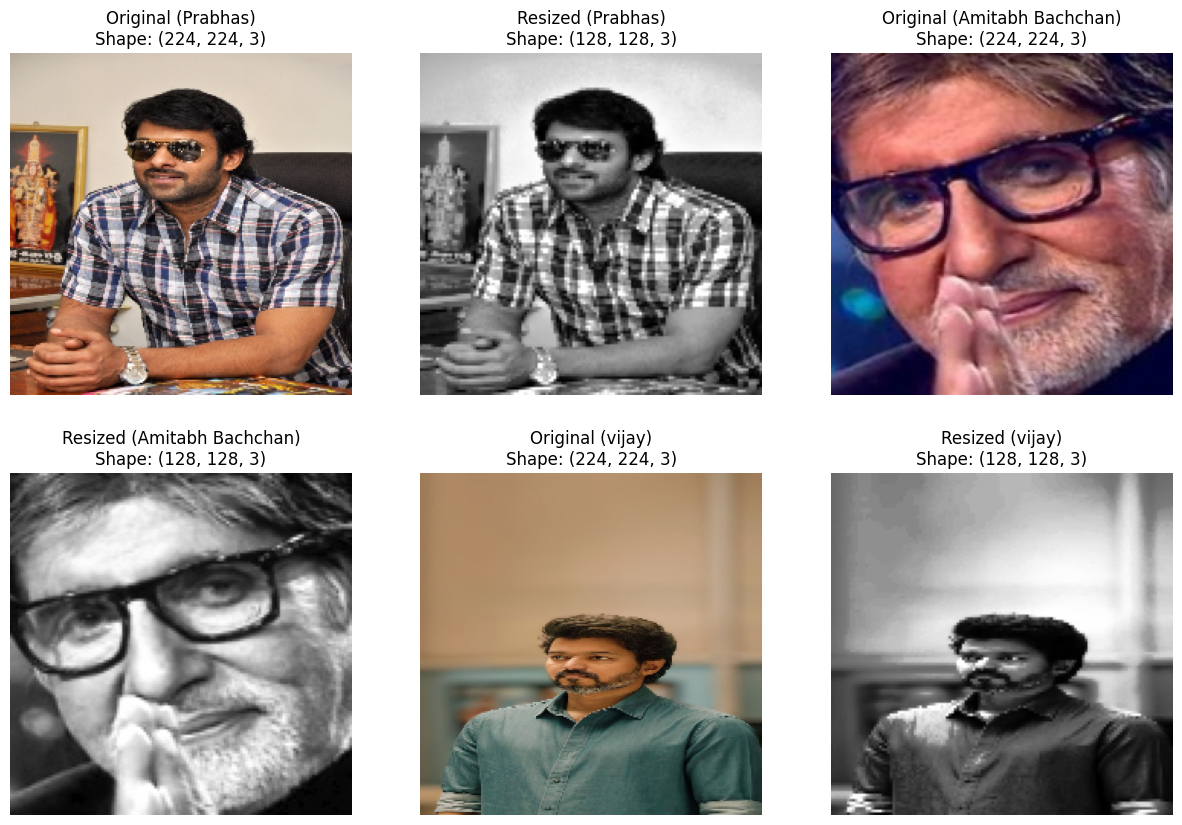

In [64]:
import matplotlib.pyplot as plt

# Function to visualize original and resized images side by side
def visualize_original_and_resized(data, preprocessed_data):
    plt.figure(figsize=(15, 10))
    
    for idx, class_name in enumerate(data.keys()):
        if len(data[class_name]) > 0:  # Ensure there are images in the class
            original_image = data[class_name][0]  # First original image of the class
            preprocessed_image = preprocessed_data[class_name][0]  # First preprocessed image of the class
            
            # Display the original image
            plt.subplot(2, len(data) * 2 // 4 + 1, 2 * idx + 1)
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Original ({class_name})\nShape: {original_image.shape}")
            plt.axis("off")
            
            # Display the resized image
            plt.subplot(2, len(data) * 2 // 4 + 1, 2 * idx + 2)
            if preprocessed_image.ndim == 3:
                plt.imshow(preprocessed_image[:, :, 0], cmap='gray')  # Grayscale or a channel
            else:
                plt.imshow(preprocessed_image, cmap='gray')  # Single-channel grayscale
            plt.title(f"Resized ({class_name})\nShape: {preprocessed_image.shape}")
            plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Call the function
visualize_original_and_resized(data, preprocessed_data)


In [65]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation function
def augment_images(class_name, images, save_path, augment_count=250):
    datagen = ImageDataGenerator(
        rotation_range=30,      # Random rotations
        width_shift_range=0.2,  # Horizontal shifts
        height_shift_range=0.2, # Vertical shifts
        shear_range=0.2,        # Shearing transformations
        zoom_range=0.2,         # Zoom in/out
        horizontal_flip=True,   # Random horizontal flipping
        brightness_range=[0.8, 1.2], # Random brightness changes
        fill_mode='nearest'     # Filling pixels outside boundaries
    )
    
    # Convert the images to numpy array
    images_array = np.array(images)
    images_array = images_array.astype('float32') / 255.0  # Normalize
    
    # Create directory for augmented images
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Generate augmented images
    total_generated = 0
    for image in datagen.flow(images_array, batch_size=1, save_to_dir=save_path,
                              save_prefix=class_name, save_format='jpg'):
        total_generated += 1
        if total_generated >= augment_count:
            break

# Augment each class
augmented_data_path = "./augmented_dataset"
for class_name, images in data.items():
    save_path = os.path.join(augmented_data_path, class_name)
    augment_images(class_name, images, save_path, augment_count=250)


In [70]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output to feed into Dense layers
    layers.Flatten(),

    # Fully Connected (Dense) Layer 1
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization

    # Output Layer
    layers.Dense(4, activation='softmax')  # 4 classes (actors)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [81]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the dataset directory
dataset_dir = '/kaggle/input/dataset/My dataset'

# Initialize lists to store image data and labels
image_data = []
labels = []
class_labels = {actor: idx for idx, actor in enumerate(os.listdir(dataset_dir))}  # actor -> label mapping

# Load images and corresponding labels
for actor in os.listdir(dataset_dir):
    actor_dir = os.path.join(dataset_dir, actor)
    
    if os.path.isdir(actor_dir):  # Only consider directories (for each actor)
        for img_name in os.listdir(actor_dir):
            img_path = os.path.join(actor_dir, img_name)
            
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check if the file is an image
                img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match input shape
                img_array = image.img_to_array(img) / 255.0  # Normalize image
                image_data.append(img_array)
                labels.append(class_labels[actor])  # Assign label based on actor

# Convert lists to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(image_data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Use `flow` method to create batches of data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 821
Validation set size: 176
Test set size: 176


In [83]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
import os

# Path to your dataset directory
dataset_dir = '/kaggle/input/dataset/My dataset'

# Dynamically get the list of celebrity names (folder names)
celebrity_names = [d.name for d in os.scandir(dataset_dir) if d.is_dir()]

# Print the list of celebrity names
print(celebrity_names)


['Prabhas', 'Amitabh Bachchan', 'vijay', 'Akshay Kumar']


In [94]:
import numpy as np
from PIL import Image
import os

# Initialize lists to store image data and labels
X_train = []
y_train = []

# Load and preprocess the data for all the images in the dataset
for name in celebrity_names:
    celebrity_folder = os.path.join(dataset_dir, name)
    
    for img_path in os.listdir(celebrity_folder):
        # Get the full path to the image
        img_full_path = os.path.join(celebrity_folder, img_path)
        
        # Open the image and convert to RGB (to ensure consistency in channels)
        img = Image.open(img_full_path).convert('RGB')
        img = img.resize((64, 64))  # Resize image to (64, 64)
        
        # Convert the image to a numpy array and normalize
        img_array = np.array(img) / 255.0  # Normalize the image to [0, 1]
        
        # Append the image array and label (index of celebrity)
        X_train.append(img_array)
        y_train.append(celebrity_names.index(name))  # The label is the index of the celebrity

# Convert lists to numpy arrays
X_train = np.array(X_train, dtype=np.float32)  # Explicitly specify dtype for consistency
y_train = np.array(y_train, dtype=np.int32)  # Ensure labels are integers

# Print the size of the training set
print(f"Training set size: {X_train.shape[0]}")


Training set size: 1173


In [95]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the size of the training and validation sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")


Training set size: 938
Validation set size: 235


In [96]:
X_train.shape

(938, 64, 64, 3)

In [97]:
y_train.shape

(938,)

In [98]:
# Define the CNN model
model = Sequential()
model.add(Input(shape=(64, 64, 3)))  # Input layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(celebrity_names), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.2901 - loss: 1.4032 - val_accuracy: 0.2426 - val_loss: 1.3718
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.2868 - loss: 1.3689 - val_accuracy: 0.3234 - val_loss: 1.3463
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.3770 - loss: 1.3245 - val_accuracy: 0.4298 - val_loss: 1.2536
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4780 - loss: 1.1961 - val_accuracy: 0.4638 - val_loss: 1.1942
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5241 - loss: 1.1268 - val_accuracy: 0.5574 - val_loss: 1.1077
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5839 - loss: 1.0034 - val_accuracy: 0.6085 - val_loss: 0.9611
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6323 - loss: 0.8678 - val_accuracy: 0.6085 - val_loss: 0.9706
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6802 - loss: 0.7609 - val_accuracy: 0.6

In [100]:
# Save the trained model to a file
model.save('face_recognition_model.h5')  # Replace with your desired file name
print("Model has been saved successfully.")

Model has been saved successfully.


In [103]:
# Save the trained model to a file
model.save('face_recognition_model.h5')  # Replace with your desired file name
print("Model has been saved successfully.")

# ---- Code to test the model on a new image ----

# Load the saved model
from tensorflow.keras.models import load_model
model = load_model('face_recognition_model.h5')  # Load the saved model

# Define class names (adjusted for your dataset)
class_names = [
    "Prabhas",
    "Amitabh Bachchan",
    "vijay",
    "Akshay Kumar"
]

# Function to preprocess the image
def preprocess_image(image_path, target_size=(64, 64)):
    """
    Preprocess the image for model prediction.
    """
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    # Resize the image to match model input
    image_resized = cv2.resize(image, target_size)
    
    # Convert to array and normalize
    image_array = img_to_array(image_resized)
    image_array = image_array / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    
    return image_array

# Test the model with a new image
image_path = "/kaggle/input/picture/vijay-latest-function-images-5145393.jpg"  # Replace with the actual path to your image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = class_names[np.argmax(prediction)]

# Output the result
print(f"The model predicts this image belongs to: {predicted_class}")


Model has been saved successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
The model predicts this image belongs to: vijay


In [105]:
# Save the trained model to a file
model.save('face_recognition_model.h5')  # Replace with your desired file name
print("Model has been saved successfully.")

# ---- Code to test the model on a new image ----

# Load the saved model
from tensorflow.keras.models import load_model
model = load_model('face_recognition_model.h5')  # Load the saved model

# Define class names (adjusted for your dataset)
class_names = [
    "Prabhas",
    "Amitabh Bachchan",
    "vijay",
    "Akshay Kumar"
]

# Function to preprocess the image
def preprocess_image(image_path, target_size=(64, 64)):
    """
    Preprocess the image for model prediction.
    """
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    # Resize the image to match model input
    image_resized = cv2.resize(image, target_size)
    
    # Convert to array and normalize
    image_array = img_to_array(image_resized)
    image_array = image_array / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    
    return image_array

# Test the model with a new image
image_path = "/kaggle/input/bachchan-2/Amitabh Bachchan Hd image.jpg"  # Replace with the actual path to your image
processed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(processed_image)
predicted_class = class_names[np.argmax(prediction)]

# Output the result
print(f"The model predicts this image belongs to: {predicted_class}")


Model has been saved successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
The model predicts this image belongs to: Amitabh Bachchan
